In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

# Carga y limpieza de datos

In [2]:
raw_data = pd.read_csv('./data/ventas.csv', encoding='utf-8', sep=',')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fecha            50 non-null     object
 1   producto         50 non-null     object
 2   cantidad         50 non-null     int64 
 3   precio_unitario  50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [4]:
# Corrigiendo formato de fecha
raw_data['fecha'] = pd.to_datetime(raw_data['fecha'], format='%Y-%m-%d')

In [5]:
raw_data.describe()

,fecha,cantidad,precio_unitario
count,50,50.000000,50.000000
mean,2023-03-27 11:31:12,5.380000,42790.000000
min,2023-01-02 00:00:00,1.000000,19990.000000
25%,2023-02-10 06:00:00,2.250000,19990.000000
50%,2023-03-20 12:00:00,6.000000,29990.000000
75%,2023-05-15 06:00:00,8.000000,49990.000000
max,2023-06-30 00:00:00,10.000000,99990.000000
std,NaN,2.926933,27850.915055


In [6]:
raw_data.value_counts('producto')

producto
Monitor      12
Impresora    11
Teclado      11
Mouse         8
Notebook      8
Name: count, dtype: int64

In [7]:
for product in raw_data['producto'].unique():
    print("Métricas para el producto:", product)
    print(raw_data[raw_data['producto'] == product].describe())
    print("\n")

Métricas para el producto: Monitor
                     fecha   cantidad  precio_unitario
count                   12  12.000000        12.000000
mean   2023-03-18 02:00:00   5.000000     46656.666667
min    2023-01-23 00:00:00   1.000000     19990.000000
25%    2023-02-04 00:00:00   2.000000     19990.000000
50%    2023-02-21 12:00:00   5.000000     29990.000000
75%    2023-05-12 06:00:00   7.500000     62490.000000
max    2023-06-22 00:00:00  10.000000     99990.000000
std                    NaN   3.357488     33933.982253


Métricas para el producto: Mouse
                     fecha  cantidad  precio_unitario
count                    8  8.000000         8.000000
mean   2023-03-11 12:00:00  5.250000     39990.000000
min    2023-01-12 00:00:00  1.000000     19990.000000
25%    2023-02-04 18:00:00  3.500000     19990.000000
50%    2023-02-27 12:00:00  4.500000     29990.000000
75%    2023-04-04 06:00:00  8.250000     49990.000000
max    2023-06-26 00:00:00  9.000000     99990.000000
std

In [8]:
# Se verifica que no exista productos duplicados en una misma fecha, no tendría sentido que exista más de una vez el mismo producto en una misma fecha a menos que el precio unitario sea diferente.
raw_data[raw_data.duplicated(subset=['fecha'], keep=False)].sort_values(by='fecha')

,fecha,producto,cantidad,precio_unitario
5,2023-03-06,Mouse,1,19990
33,2023-03-06,Teclado,1,19990
43,2023-03-31,Impresora,3,49990
49,2023-03-31,Mouse,8,29990
3,2023-05-24,Notebook,8,29990
41,2023-05-24,Monitor,1,99990
7,2023-06-26,Notebook,4,29990
25,2023-06-26,Mouse,9,49990


Se verifica que la data es consistente y no presenta valores nulos o fuera de lo común.
De igual forma se aplican los filtro necesarios para evitar que en data futura se presenten errores.

In [9]:
data_cleaned = raw_data[(raw_data['cantidad'] > 0) & (raw_data['precio_unitario'] > 0)]
data_cleaned.dropna(inplace=True)

In [10]:
# Creando la columna 'total' para el total de ventas de cada producto para su respectiva fecha
data_cleaned['total'] = data_cleaned['cantidad'] * data_cleaned['precio_unitario']

In [11]:
data_cleaned.sort_values(by='fecha', inplace=True)

In [12]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 24 to 8
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            50 non-null     datetime64[ns]
 1   producto         50 non-null     object        
 2   cantidad         50 non-null     int64         
 3   precio_unitario  50 non-null     int64         
 4   total            50 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.3+ KB


In [13]:
data_cleaned.to_csv('data/data_cleaned.csv', index=False)

# Análisis

**(a) Producto más vendido (en cantidad de unidades):**

In [14]:
data_cleaned.groupby('producto')['cantidad'].sum().sort_values(ascending=False)

producto
Teclado      69
Monitor      60
Impresora    50
Notebook     48
Mouse        42
Name: cantidad, dtype: int64

**(b) Producto más vendido (en valor total):**

In [15]:
data_cleaned.groupby('producto')['total'].sum().sort_values(ascending=False)

producto
Monitor      2539400
Teclado      2489310
Notebook     2239520
Impresora    2089500
Mouse        1879580
Name: total, dtype: int64

**(c) Facturación total por mes:**

In [16]:
data_cleaned.groupby(data_cleaned['fecha'].dt.to_period('M'))['total'].sum()

fecha
2023-01    1689580
2023-02    1859410
2023-03    2429500
2023-04     729840
2023-05    2739300
2023-06    1789680
Freq: M, Name: total, dtype: int64

# Visualizaciones

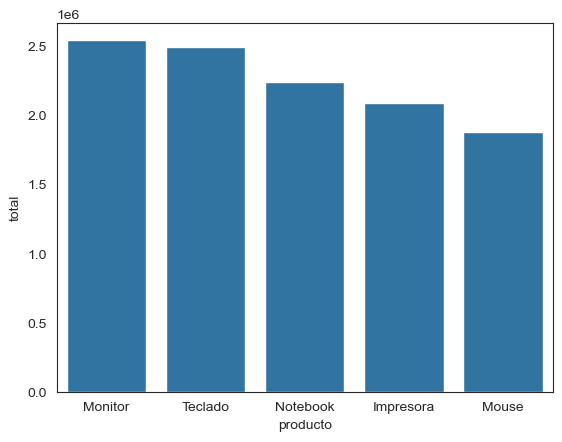

In [17]:
facturacion_por_producto = data_cleaned.groupby('producto')['total'].sum().sort_values(ascending=False)
sns.barplot(data=facturacion_por_producto.reset_index(), x='producto', y='total');

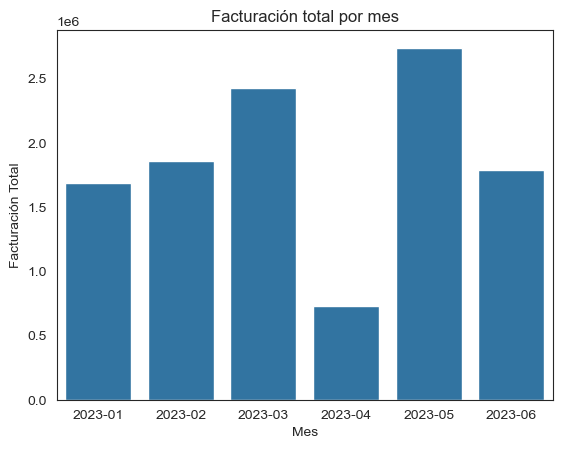

In [18]:
facturacion_mensual = data_cleaned.groupby(data_cleaned['fecha'].dt.to_period('M'))['total'].sum()
sns.barplot(data=facturacion_mensual.reset_index(), x='fecha', y='total')
plt.title("Facturación total por mes")
plt.xlabel("Mes")
plt.ylabel("Facturación Total")
plt.savefig('output/grafico_mvp.png')

In [19]:
facturacion_mensual_producto = data_cleaned.groupby([data_cleaned['fecha'].dt.to_period('M'), 'producto'])['total'].sum()
facturacion_mensual_producto = facturacion_mensual_producto.reset_index()
facturacion_mensual_producto['fecha'] = facturacion_mensual_producto['fecha'].dt.to_timestamp()
facturacion_mensual_producto

,fecha,producto,total
0,2023-01-01,Impresora,239880
1,2023-01-01,Monitor,519860
2,2023-01-01,Mouse,579910
3,2023-01-01,Teclado,349930
4,2023-02-01,Monitor,569790
5,2023-02-01,Mouse,509890
6,2023-02-01,Notebook,479880
7,2023-02-01,Teclado,299850
8,2023-03-01,Impresora,1099810
9,2023-03-01,Monitor,209930


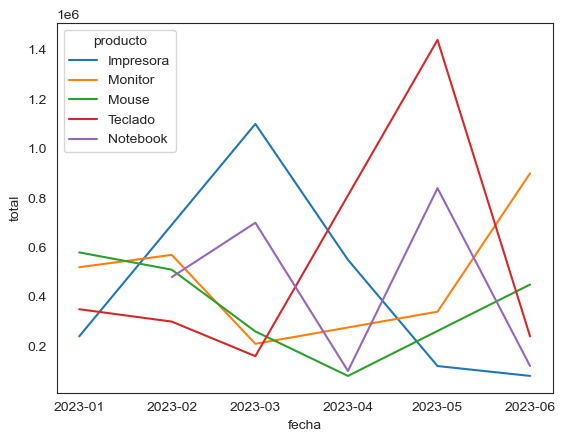

In [20]:
sns.lineplot(data=facturacion_mensual_producto, x='fecha', y='total', hue='producto');

# Preparación DB

In [21]:
reporte_productos = data_cleaned.groupby('producto').agg(total_cantidad=('cantidad', 'sum'), total_facturado=('total', 'sum'))
reporte_productos

,total_cantidad,total_facturado
producto,,
Impresora,50,2089500
Monitor,60,2539400
Mouse,42,1879580
Notebook,48,2239520
Teclado,69,2489310


In [23]:
import sqlite3
try:
    # Creando conexión a la base de datos SQLite
    conn = sqlite3.connect('output/db_test.db')
    # Guardando el dataframe en la base de datos
    reporte_productos.to_sql('reporte_productos', conn, if_exists='replace', index=False)
    print("Prueba exitosa: La tabla 'reporte_productos' se guardó exitosamente.")

    # Verificando que los datos se guardaron correctamente
    test_db = pd.read_sql('SELECT * FROM reporte_productos', conn)
    print(test_db.head())
    conn.close()

except Exception as e:
    print(f"Ocurrió un error durante la prueba de base de datos: {e}")

Prueba exitosa: La tabla 'reporte_productos' se guardó exitosamente.
   total_cantidad  total_facturado
0              50          2089500
1              60          2539400
2              42          1879580
3              48          2239520
4              69          2489310
